In [1]:
from scripts.shared_utilities import *

2024-06-05 12:54:54.866369: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 12:54:54.869633: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 12:54:54.914895: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 12:54:55.767860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = KerasCNNModel(path=Path("../models/modello-passi-sonno-CNN.keras"),load=False)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 20)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           961 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,801 (26.57 KB)

 Trainable params: 6,801 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
data = DateStepSleepData(sleep_score="dmn_sleep_score_all",dataset_chunk=DEFAULT_CHUNK_SIZE)
data.get_dataset().describe()

steps   sleep_score        n_date   n_steps_all  \
count  97961.000000  59921.000000  97961.000000  97961.000000   
mean    7259.689101      0.606849      0.519572      0.022962   
std     4732.470150      0.137646      0.286742      0.999433   
min        1.000000     -2.543016      0.000000     -1.509974   
25%     3837.080000      0.533027      0.274725     -0.699847   
50%     6536.030000      0.638021      0.521978     -0.129865   
75%     9927.870000      0.708090      0.774725      0.586446   
max    85113.800000      0.989168      1.000000     16.464692   

       n_sleep_score_all       m_steps      dm_steps  mn_steps_all  \
count       59921.000000  90099.000000  88705.000000  90099.000000   
mean            0.031973   7384.298780      1.882425      0.049278   
std             0.928220   3273.249260    561.302827      0.691266   
min           -21.209186     17.497143  -7723.676000     -1.506491   
25%            -0.465850   5068.206000   -289.269000     -0.439849   
50%             0.242178   7073.233000      2.143750     -0.016415   
75%             0.714690   9302.760500    291.625000      0.454431   
max             2.610144  31361.702000   6837.086667      5.112980   

       dmn_steps_all  m_sleep_score  dm_sleep_score  mn_sleep_score_all  \
count   88705.000000   57998.000000    56786.000000        57998.000000   
mean        0.000398       0.608775       -0.000001            0.044959   
std         0.118540       0.082902        0.017607            0.559048   
min        -1.631135      -0.039747       -0.408979           -4.328360   
25%        -0.061090       0.565067       -0.009162           -0.249787   
50%         0.000453       0.621753        0.000000            0.132476   
75%         0.061587       0.664272        0.009153            0.419205   
max         1.443900       0.896719        0.344179            1.986715   

       dmn_sleep_score_all  
count         56786.000000  
mean             -0.000010  
std               0.118731  
min              -2.757957  
25%              -0.061787  
50%               0.000000  
75%               0.061725  
max               2.320976

In [4]:
utils = Utilities(model, data)

In [ ]:
utils.train_model()

In [ ]:
utils.evaluate_model()

In [7]:
model.save()

Per questo modello è stato fatto un tentativo di usare i dati sulle differenze tra finestre consecutive. Ma visto che l'andamento ha tante piccole variazioni, la differenza finisce per accentuare il rumore. Le predizioni non sono un granché.

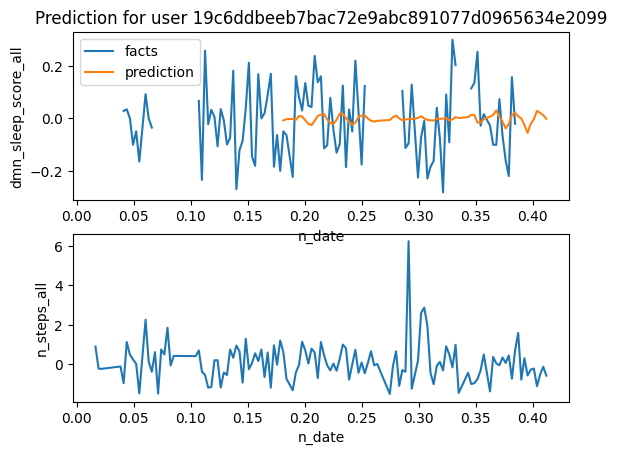

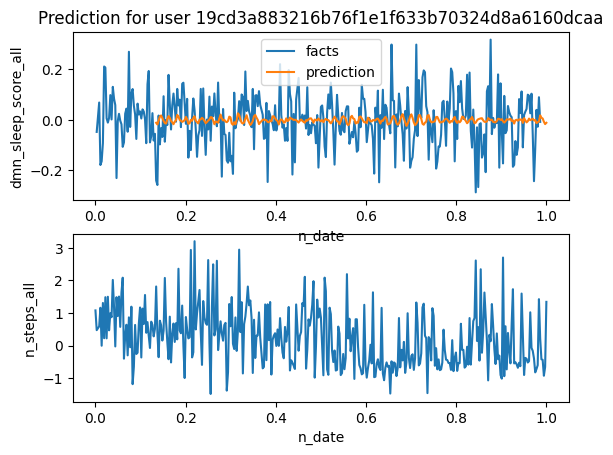

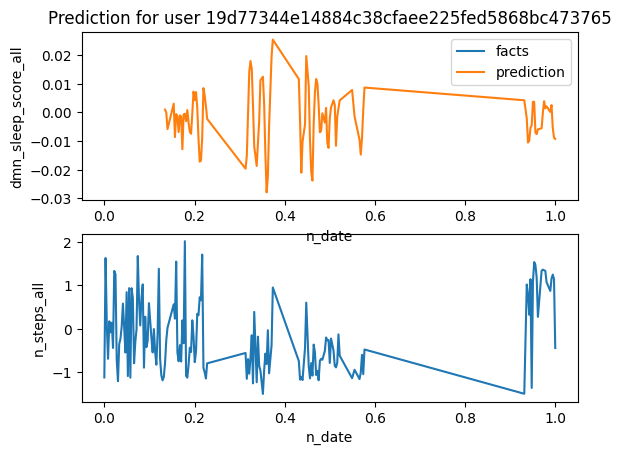

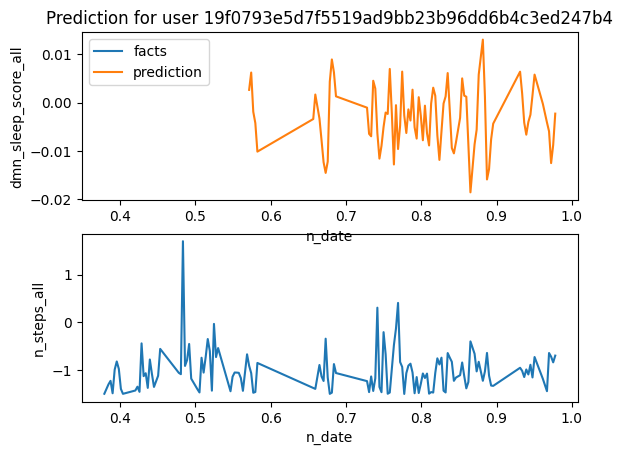

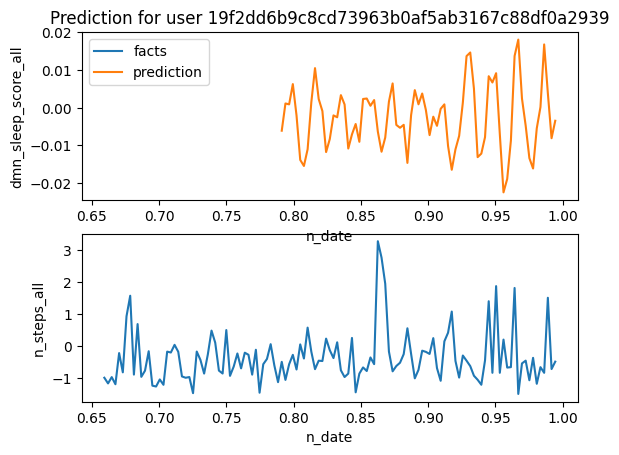

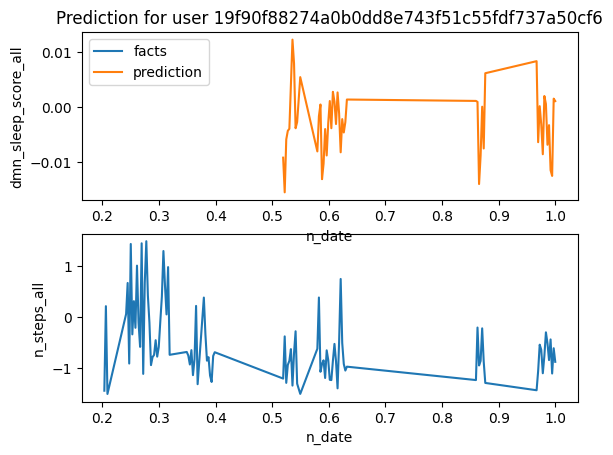

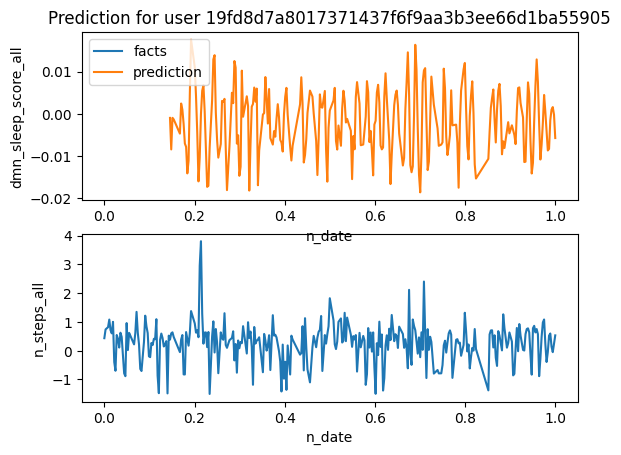

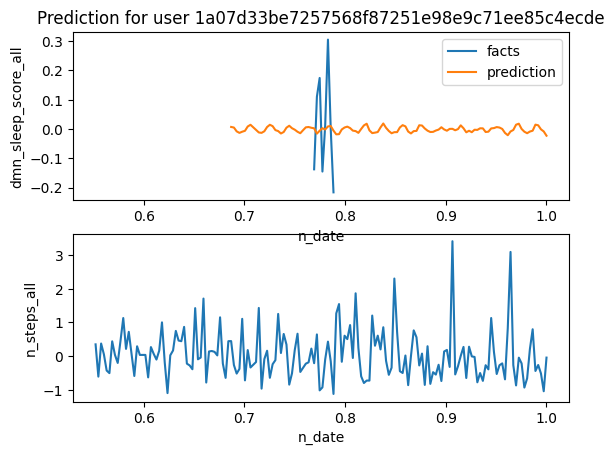

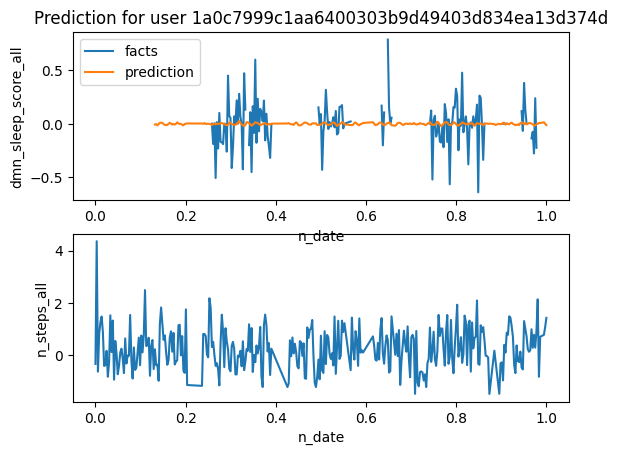

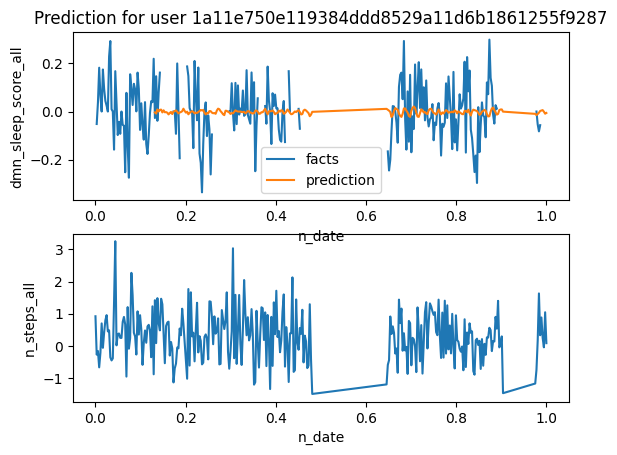

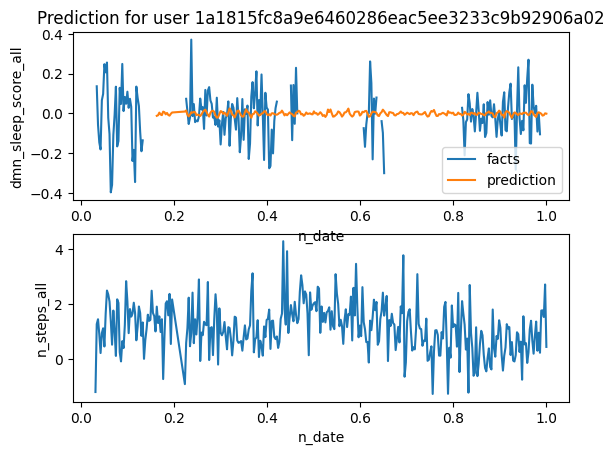

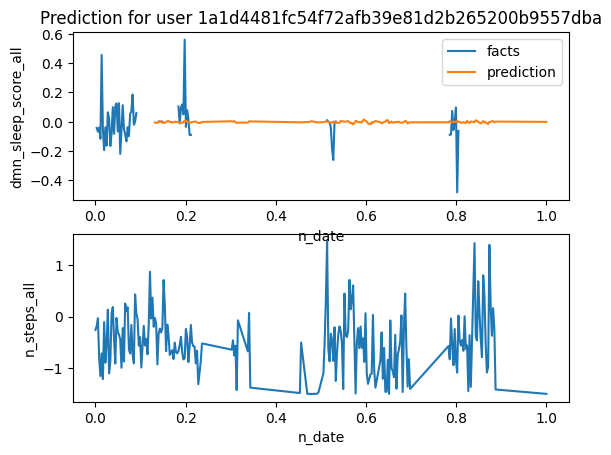

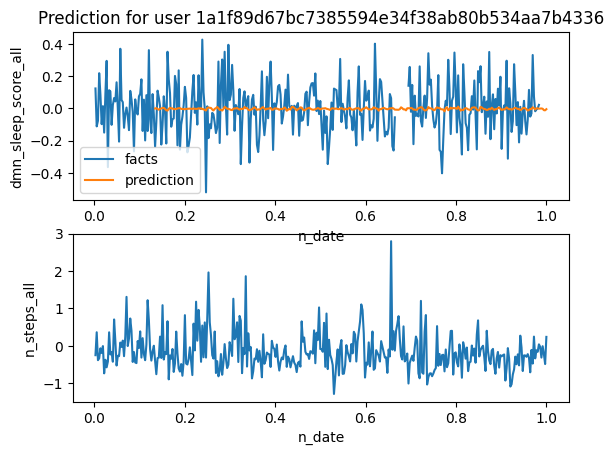

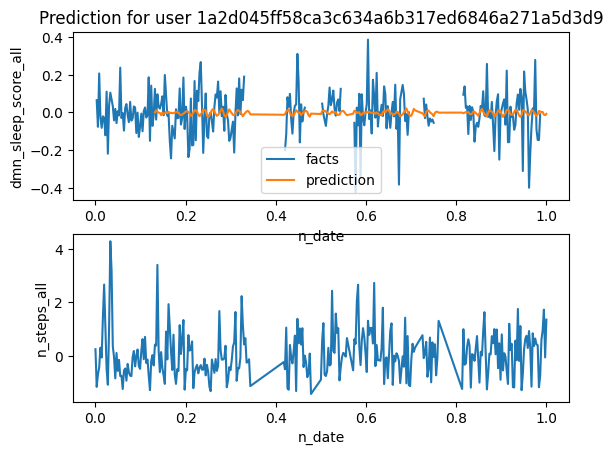

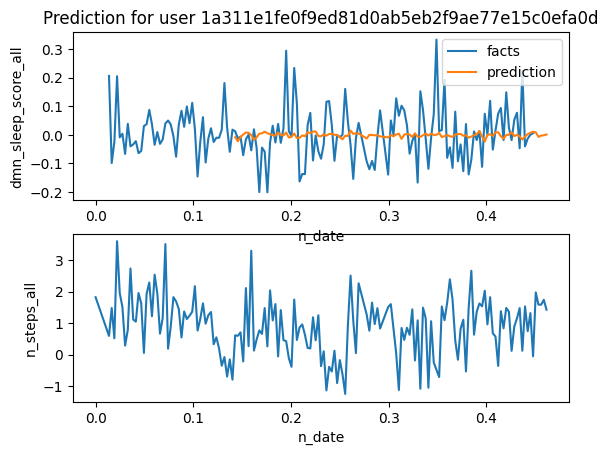

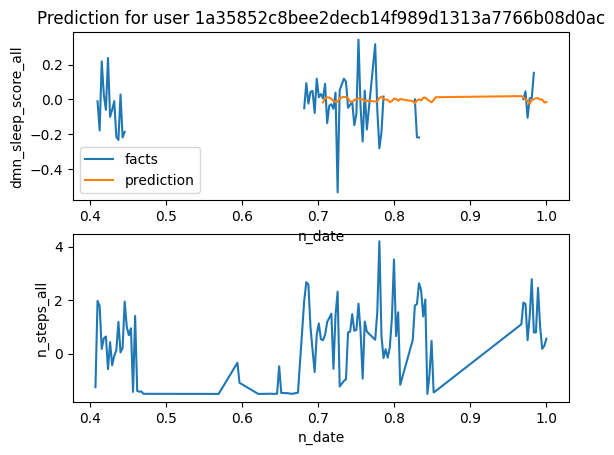

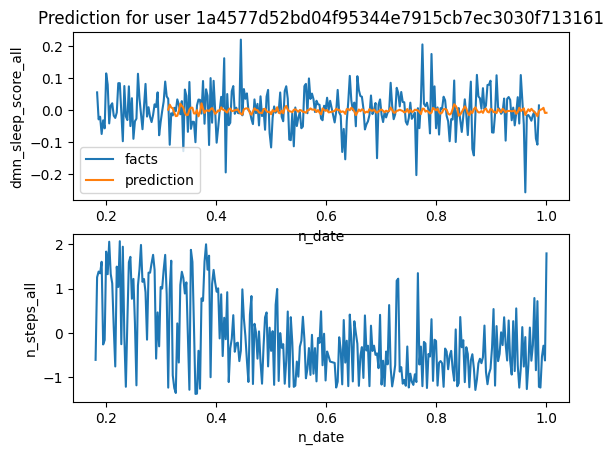

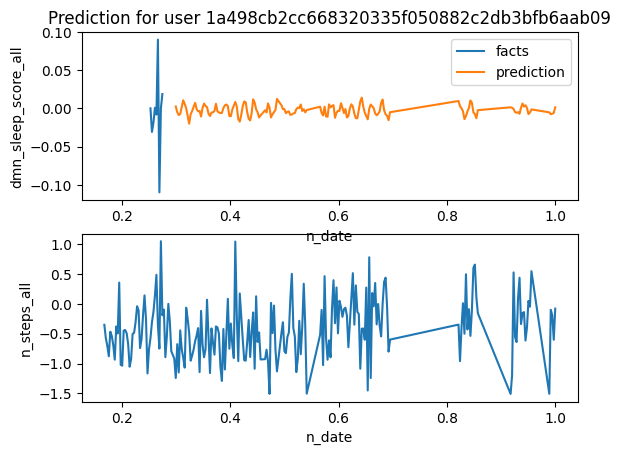

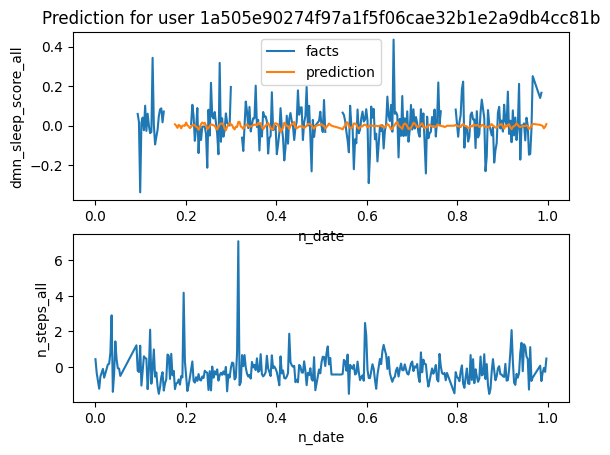

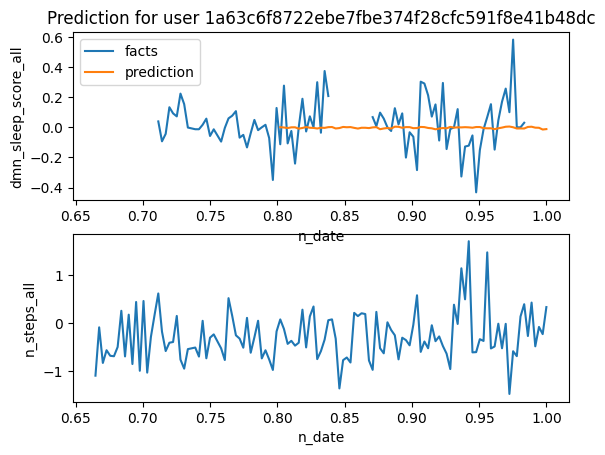

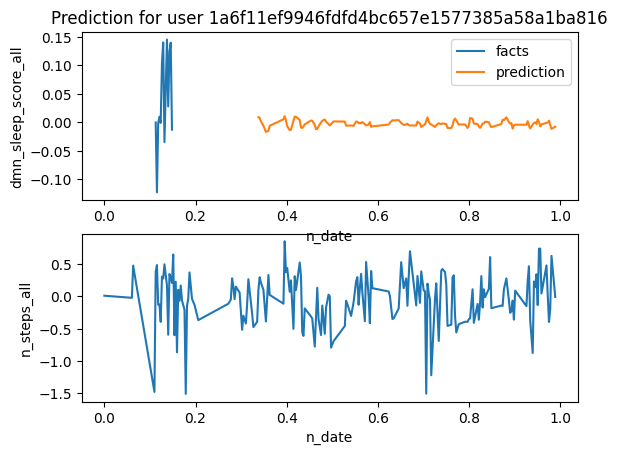

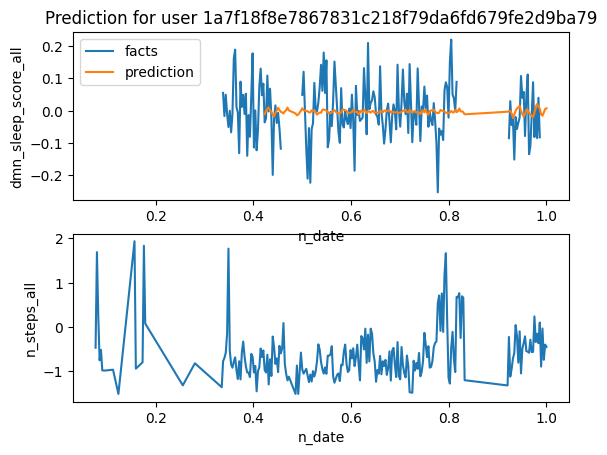

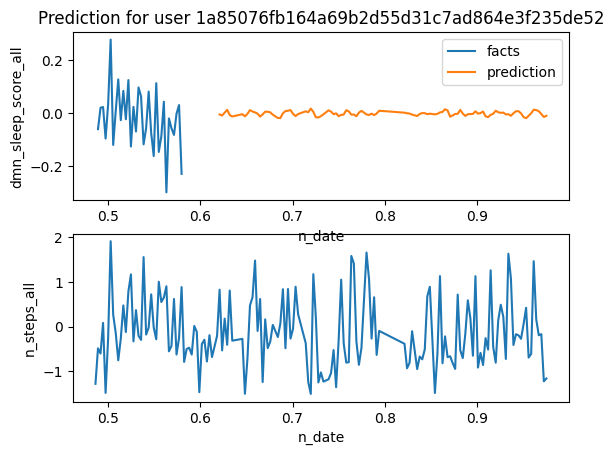

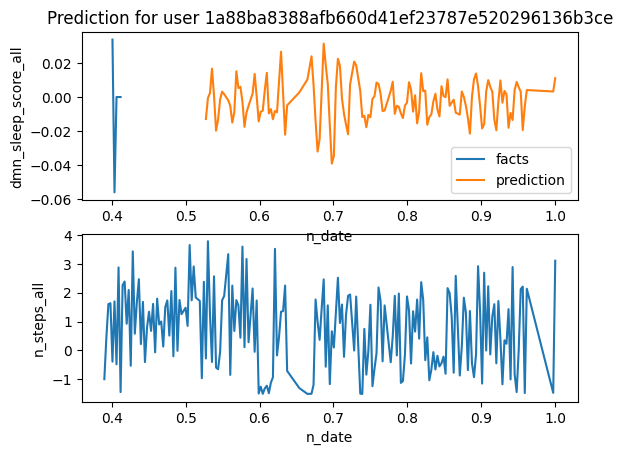

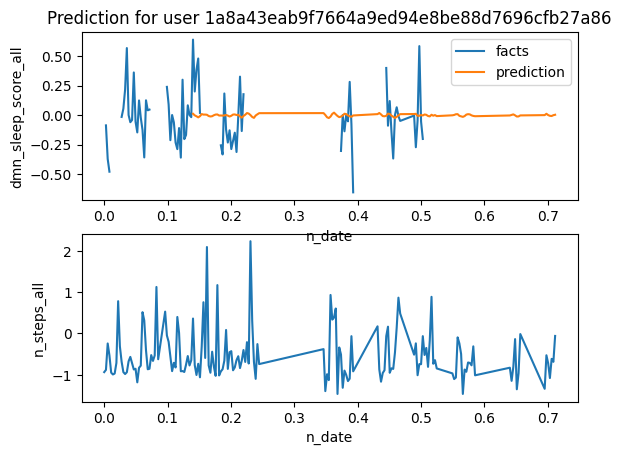

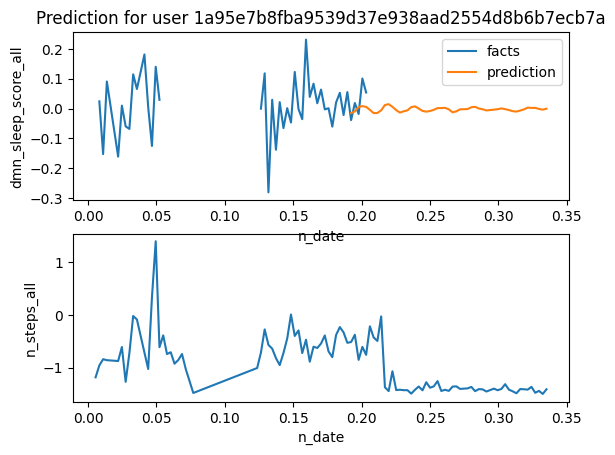

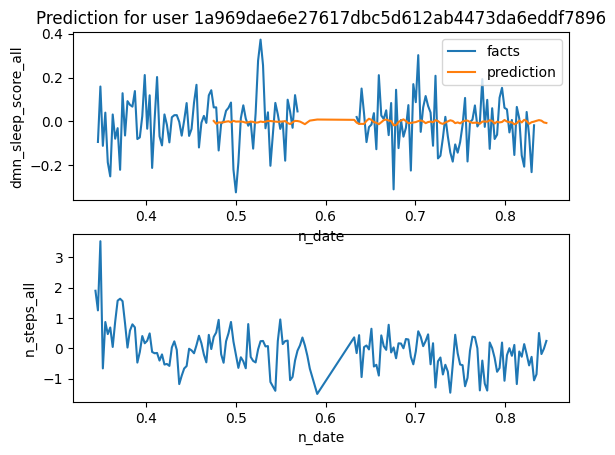

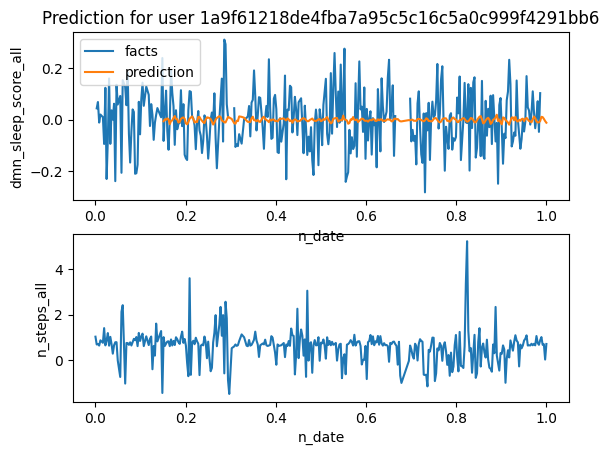

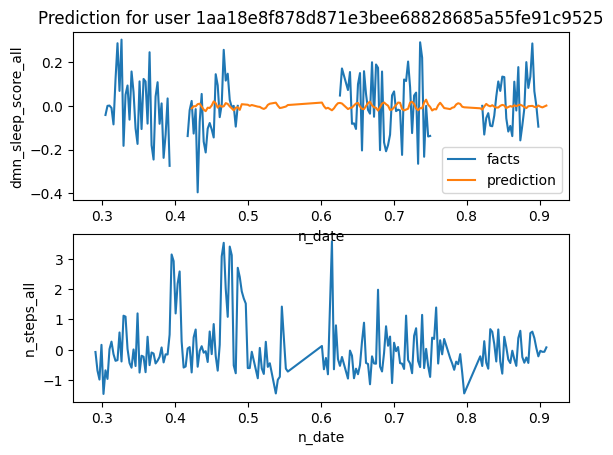

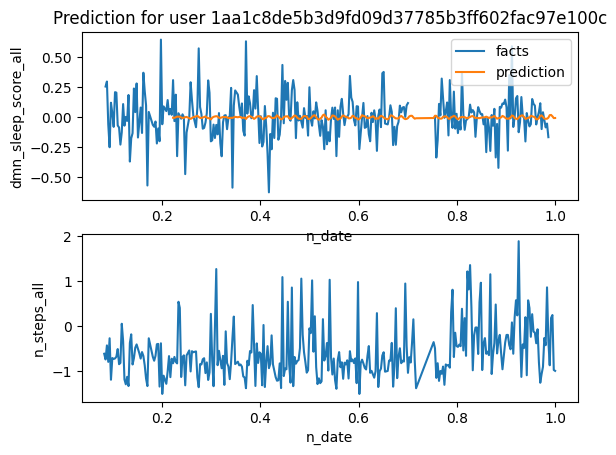

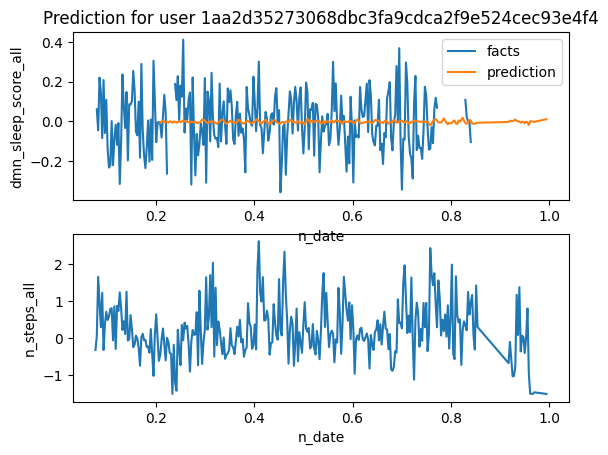

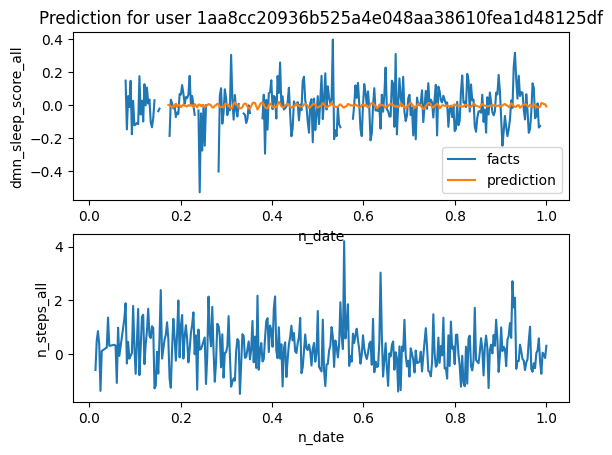

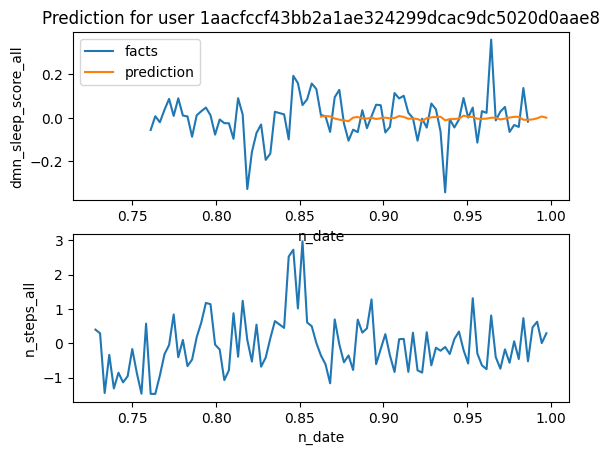

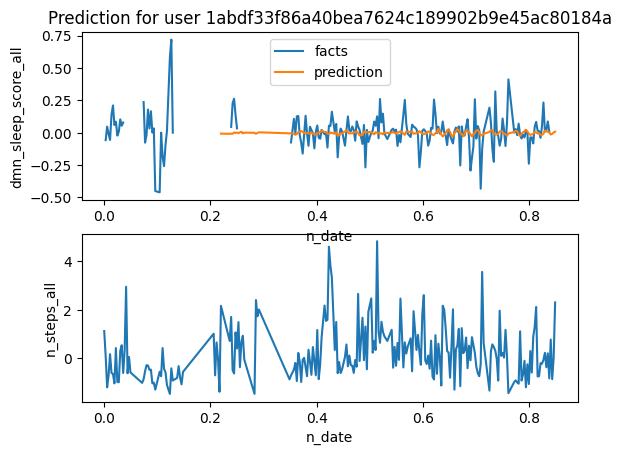

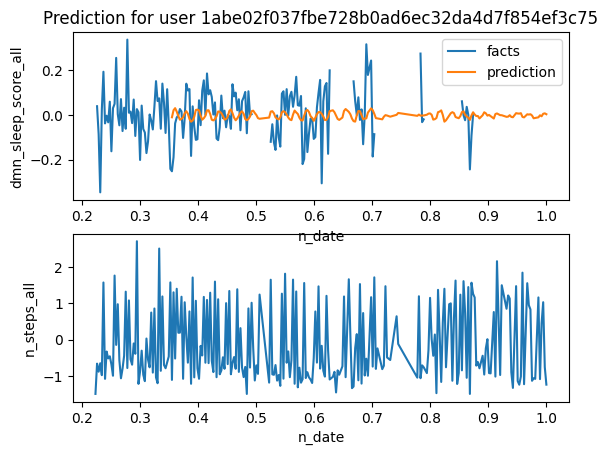

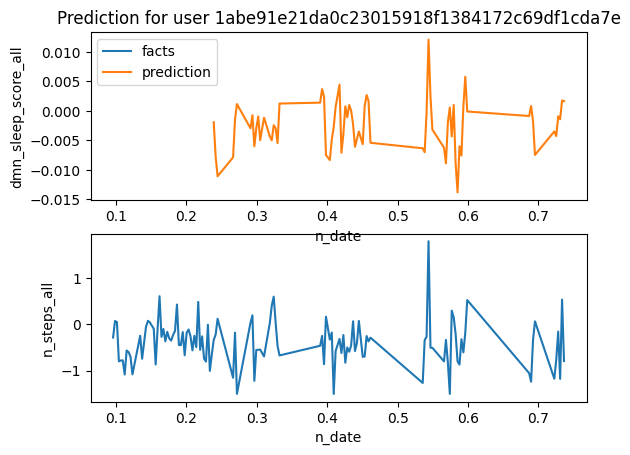

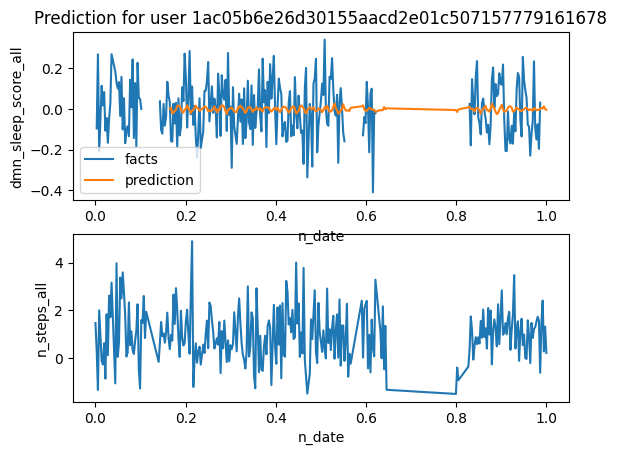

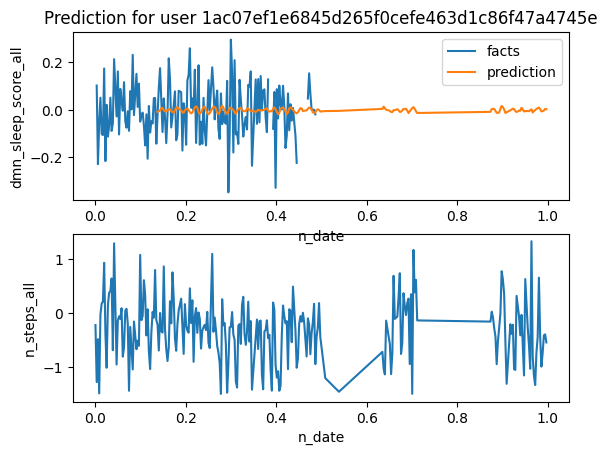

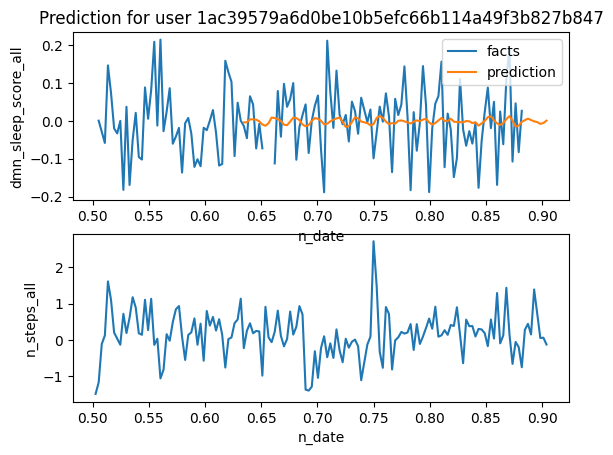

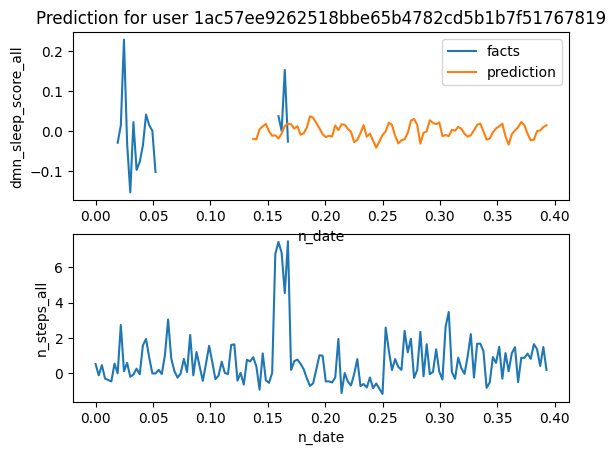

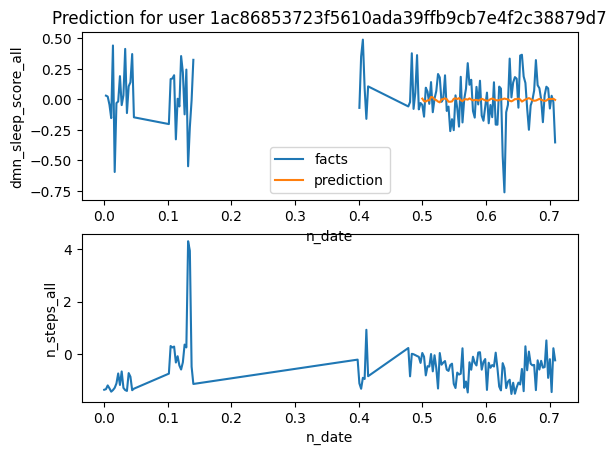

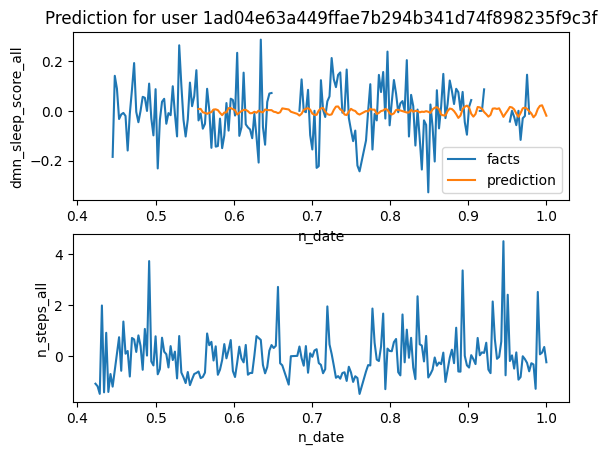

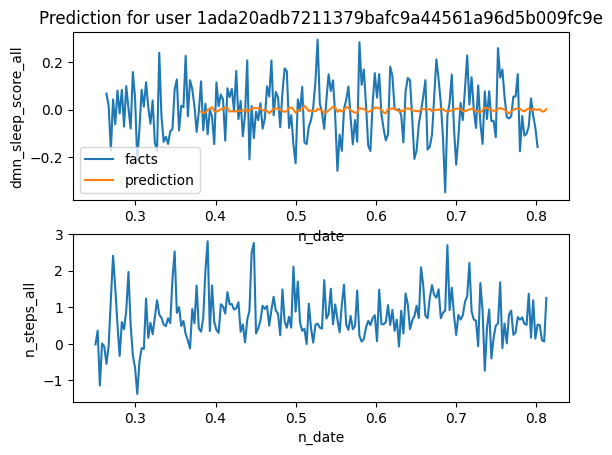

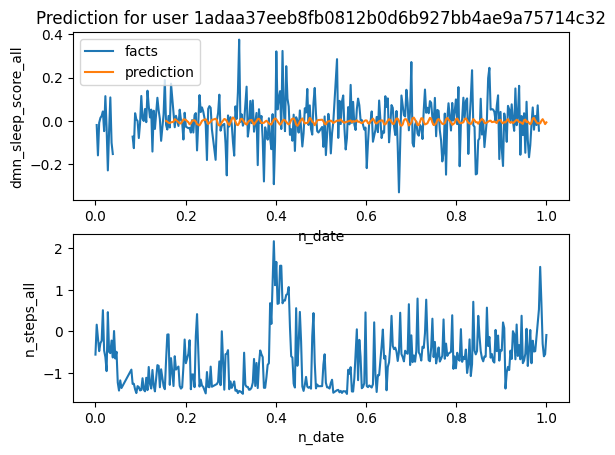

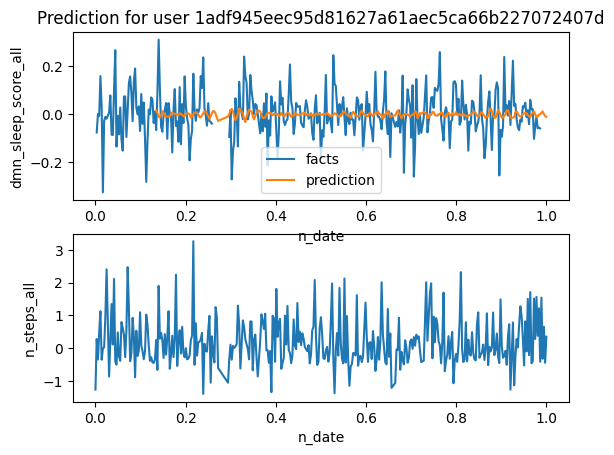

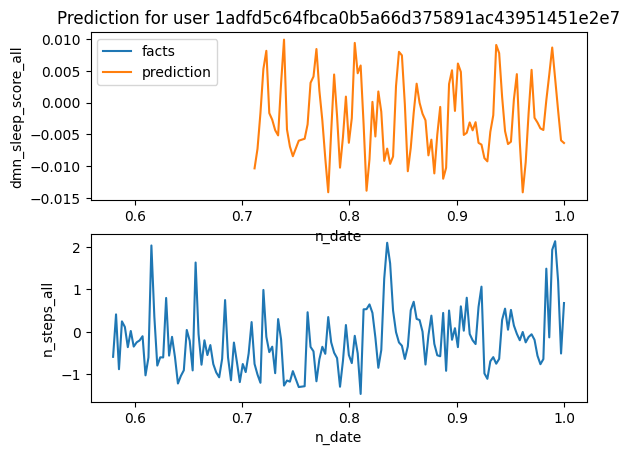

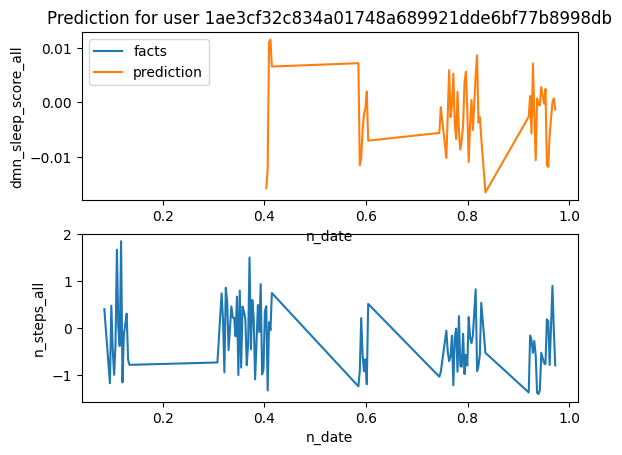

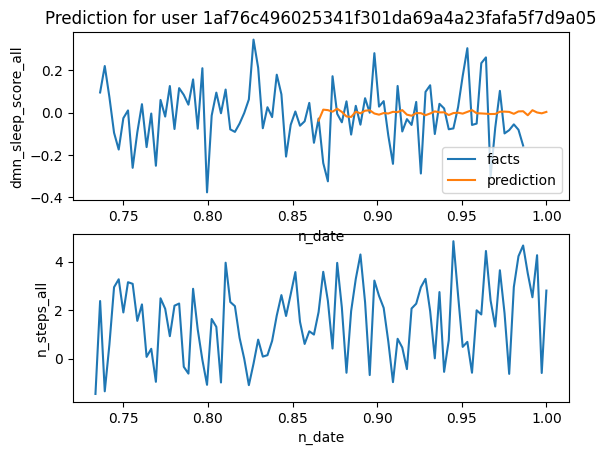

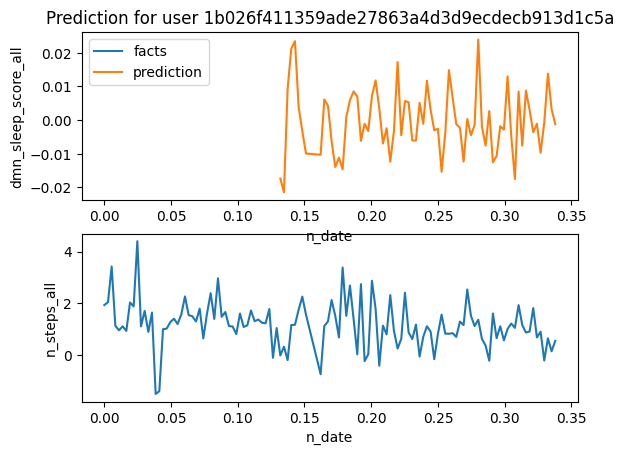

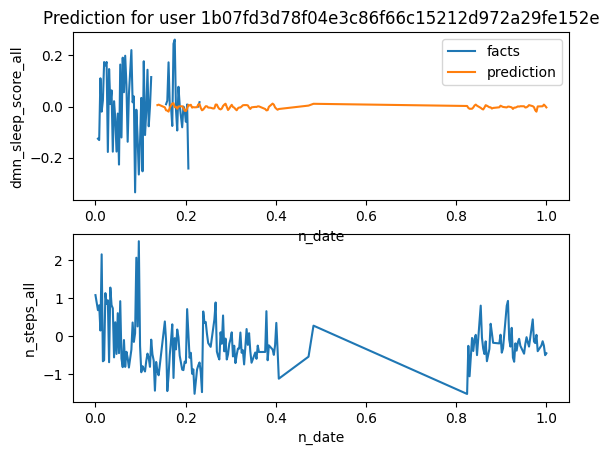

In [8]:
DateSleepStepPredictionVisualization(model, data = DateStepSleepData(sleep_score="dmn_sleep_score_all",chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE)).visualize()